In [28]:
print("DISTRIBUTIONS")

<function print>

In [14]:
print("GEOMETRIC DISTRIBUTION")

GEOMETRIC DISTRIBUTION


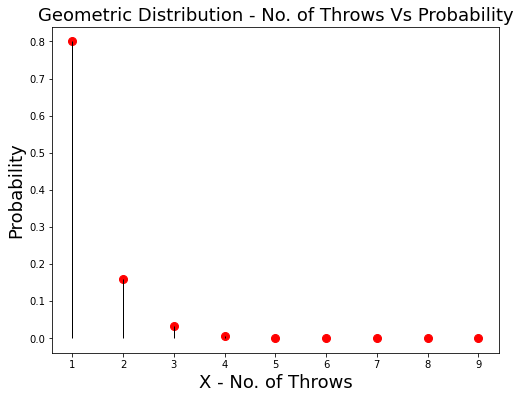

In [15]:
from scipy.stats import geom
import matplotlib.pyplot as plt
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p = 0.8
geom_pd = geom.pmf(X, p)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pd, 'ro', ms=8, label='geom pmf') 
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Throws", fontsize="18")
plt.title("Geometric Distribution - No. of Throws Vs Probability", fontsize="18")
ax.vlines(X, 0, geom_pd, colors='black', lw=1, alpha=1)

In [16]:
print("POISSON DISTRIBUTION")

POISSON DISTRIBUTION


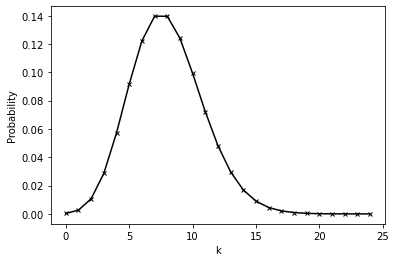

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

k = np.arange(0, 25)
pmf = poisson.pmf(k, mu=8)
pmf = np.round(pmf, 5)  # round off to fifth decimal place
plt.plot(k, pmf, marker='x', color='black', ms=3.5)
plt.xlabel('k')
plt.ylabel('Probability')
plt.show()


In [19]:
print("NORMAL DISTRIBUTION")

NORMAL DISTRIBUTION


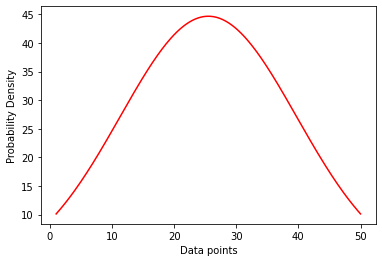

In [20]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating a series of data in the range of 1-50.
x = np.linspace(1, 50, 200)

# Creating a Function for the Normal Distribution (PDF)
def normal_dist(x, mean, sd):
    prob_density = (np.pi * sd) * np.exp(-0.5 * ((x - mean) / sd) ** 2)
    return prob_density

# Calculate mean and standard deviation.
mean = np.mean(x)
sd = np.std(x)

# Apply the function to the data.
pdf = normal_dist(x, mean, sd)

# Plotting the Results
plt.plot(x, pdf, color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.show()


In [21]:
print("EXPONENTIAL DISTRIBUTION")

EXPONENTIAL DISTRIBUTION


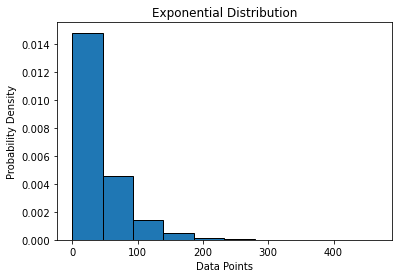

In [29]:
from scipy.stats import expon
import matplotlib.pyplot as plt

# Generate an exponential distribution with a sample size of 25000
x = expon.rvs(scale=40, size=25000)

# Create a plot of the exponential distribution
plt.hist(x, density=True, edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Data Points')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution')

# Display the plot
plt.show()


In [ ]:
print("MAXIMUM LIKELYHOOD")

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

# Generate an independent variable
x = np.linspace(-10, 30, 100)

# Generate a normally distributed residual
e = np.random.normal(10, 5, 100)

# Generate ground truth
y = 10 + 4*x + e

# Create a DataFrame to store the data
df = pd.DataFrame({'x': x, 'y': y})

# Display the first few rows of the DataFrame
df.head()


,x,y
0,-10.000000,-26.567496
1,-9.595960,-13.513975
2,-9.191919,-10.149863
3,-8.787879,-12.516668
4,-8.383838,0.128111


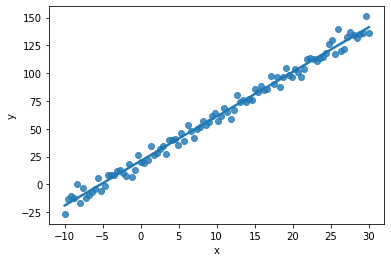

In [31]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [32]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8826.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           7.97e-98
Time:                        12:27:34   Log-Likelihood:                -301.35
No. Observations:                 100   AIC:                             606.7
Df Residuals:                      98   BIC:                             611.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0500      0.656     32.113      0.000      19.749      22.351
x              4.0083      0.043     93.944      0.000       3.924       4.093
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.494
Skew:                           0.386   Prob(JB):                        0.287
Kurtosis:                       2.942   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
# extract parameters
    const, beta, std_dev = parameters
# predict the output
    pred = const + beta*x
# Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
# Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

In [35]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 301.3523056455746
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0004718 , -0.00143245,  0.00046612])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 244
      nit: 38
     njev: 61
   status: 0
  success: True
        x: array([21.04987663,  4.00834811,  4.9263396 ])

In [36]:
print("CENTRAL LIMIT THEOREM")

CENTRAL LIMIT THEOREM


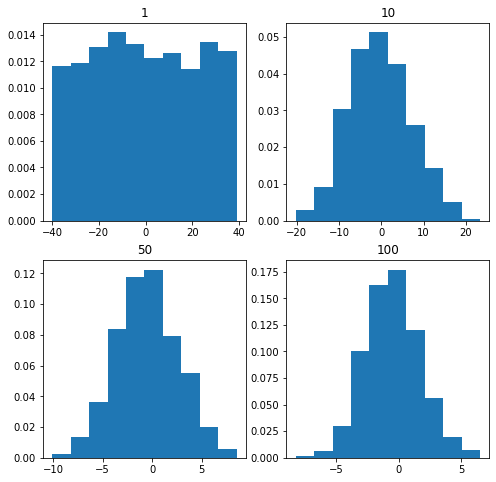

In [37]:
import numpy
import matplotlib.pyplot as plt

# List of the number of samples
num = [1, 10, 50, 100]

# List to store the sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40,
# taking their mean, and appending it to the list 'means'.
for j in num:
    # Generating seed so that we can get the same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(numpy.random.randint(-40, 40, j)) for _i in range(1000)]
    means.append(x)

k = 0

# Plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in 'means'
        ax[i, j].hist(means[k], 10, density=True)
        ax[i, j].set_title(label=num[k])
        k = k + 1

plt.show()
